Diana's Code:

In [44]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

In [45]:
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv') 

In [46]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [47]:
diabetes.describe()

,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [48]:
diabetes.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [49]:
diabetes = diabetes.drop(['County', 'State'], axis = 1)

In [50]:
diabetes = diabetes.apply(pd.to_numeric, errors = 'coerce')
diabetes.dtypes

CountyFIPS                                                                            int64
Diabetes_Number                                                                     float64
Obesity_Number                                                                      float64
Physical_Inactivity_Number                                                          float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)    float64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [51]:
diabetes.head()

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,1001,5178.0,13489.0,12525.0,76.5,55200,54170,1030,54170,42437,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,1003,16707.0,48542.0,40024.0,86.6,208107,204535,3572,204535,179526,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,1005,3400.0,8009.0,5431.0,76.2,25782,25429,353,25429,12216,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,1007,2371.0,6534.0,5827.0,80.5,22527,22340,187,22340,17268,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,1009,6282.0,14227.0,14365.0,79.7,57645,56710,935,56710,55054,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [52]:
diabetes.shape

(3220, 93)

In [54]:
diabetes_normalize = diabetes.drop (["CountyFIPS", "race_total population"], axis = 1).div(diabetes['race_total population'], axis = "index")
diabetes_normalize['CountyFIPS'] = diabetes['CountyFIPS']
diabetes_normalize['race_total population'] = diabetes['race_total population']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233E65A35C8>]],
      dtype=object)

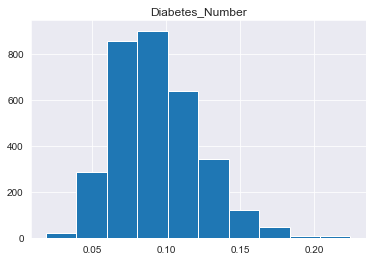

In [58]:
diabetes_normalize.hist(column='Diabetes_Number')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233E65A3448>]],
      dtype=object)

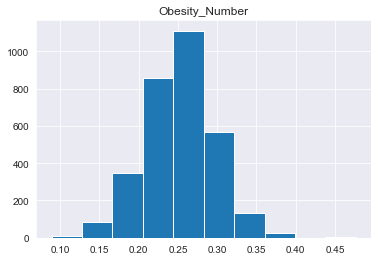

In [59]:
diabetes_normalize.hist(column='Obesity_Number')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233E63FE248>]],
      dtype=object)

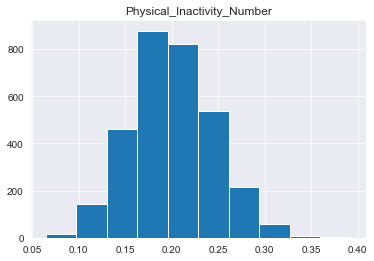

In [61]:
diabetes_normalize.hist(column='Physical_Inactivity_Number')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233E6D2F188>]],
      dtype=object)

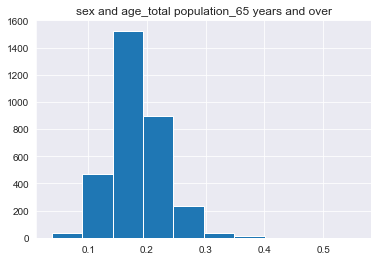

In [62]:
diabetes_normalize.hist(column= 'sex and age_total population_65 years and over')

In [68]:
diabetes_normalize.head(15)

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,CountyFIPS,race_total population
0,0.093804,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,...,0.145833,0.757808,0.363297,0.394511,0.001668,0.145833,0.063188,0.082645,1001,55200
1,0.080281,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,...,0.195404,0.780512,0.375307,0.405205,0.000445,0.195404,0.090675,0.104730,1003,208107
2,0.131875,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,...,0.179738,0.789155,0.423668,0.365488,0.004495,0.179738,0.077729,0.102009,1005,25782
3,0.105251,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,...,0.162516,0.793182,0.425179,0.368003,0.005127,0.162516,0.072491,0.090025,1007,22527
4,0.108977,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,...,0.177518,0.766363,0.374621,0.391743,0.001658,0.177518,0.078758,0.098760,1009,57645
5,0.224208,0.353748,0.321967,0.007110,1.000000,0.000000,1.000000,0.219861,0.762461,0.011785,...,0.156105,0.792311,0.437307,0.355004,0.011901,0.156105,0.066171,0.089934,1011,10352
6,0.145318,0.349513,0.300974,0.003451,0.983870,0.016130,0.983870,0.520050,0.452185,0.000100,...,0.190062,0.771985,0.347915,0.424070,0.004095,0.190062,0.077653,0.112409,1013,20025
7,0.127648,0.298580,0.234140,0.000640,0.976229,0.023771,0.976229,0.743349,0.205703,0.003067,...,0.168430,0.781091,0.369207,0.411884,0.000778,0.168430,0.071443,0.096987,1015,115098
8,0.141518,0.324425,0.220570,0.002167,0.989742,0.010258,0.989742,0.575977,0.393750,0.002868,...,0.189470,0.792881,0.374978,0.417903,0.002652,0.189470,0.080145,0.109324,1017,33826
9,0.122848,0.300429,0.237342,0.003354,0.991955,0.008045,0.991955,0.928209,0.049008,0.009129,...,0.217422,0.795536,0.393262,0.402274,0.003783,0.217422,0.100994,0.116427,1019,25853
